<a href="https://colab.research.google.com/github/kotharisanjana/CMPE258_DeepLearning_Spring2023/blob/main/Assignment_3/a_NN_Numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Write  a colab in numpy only from scratch 3 layer deep neural network for non linear regression . Use proper non linear activation functions and proper number of hidden layer neurons - show the results / loss and epochs training and final output . You will be doing manual backprop and chain rule based gradient propagation.**

In [1]:
# Imports

import numpy as np
from typing import Callable
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Generate non-linear data

n = 500
dim = 3
x = np.random.uniform(-1, 1, (n, dim))
print('Input shape =', x.shape)

Input shape = (500, 3)


In [3]:
# Initialize weights and bias

weights = np.array([[2, -3, 1]]).T
bias = np.array([8])
print('Weights shape =', weights.shape)
print('Bias shape =', bias.shape)

# non-linear 3 variable function we want to learn
y_true = np.einsum('ij, jk -> ik', (x**3),  weights) + np.einsum('ij, jk -> ik', (x**2),  weights) + np.einsum('ij, jk -> ik', x, weights) + bias
print('Function output shape =', y_true.shape)

Weights shape = (3, 1)
Bias shape = (1,)
Function output shape = (500, 1)


In [4]:
# Hyperparamter initializations

input_dim = dim
output_dim = 1
hidden_dim = 16

learning_rate = 0.01
num_epochs = 50

In [5]:
# Linear layer class

class Linear:
  def __init__(self, input_dim, output_dim):
    self.weights = np.random.randn(input_dim, output_dim) * np.sqrt(2.0/input_dim)
    self.bias = np.zeros(output_dim)

  def __call__(self, x):
    self.x = x
    return np.einsum('ij, jk -> ik', x, self.weights) + self.bias

  def backward(self, gradient):
    self.weights_gradient = np.einsum('ij, jk -> ik', self.x.T, gradient) #self.x.T @ gradient
    self.bias_gradient = gradient.sum(axis=0)
    self.x_gradient = np.einsum('ij, jk -> ik', gradient, self.weights.T) #gradient @ self.weights.T
    return self.x_gradient

  def update(self, lr):
    self.weights = self.weights - (lr * self.weights_gradient)
    self.bias = self.bias - (lr * self.bias_gradient)

In [6]:
# Error function - Mean Square Error

class MeanSquareError:
  def __call__(self, y_pred, y_true):
    self.y_pred = y_pred
    self.y_true = y_true
    return ((self.y_pred - self.y_true) ** 2).mean()

  def backward(self):
    self.n = self.y_true.shape[0]
     # gradient of loss function wrt y_pred
    self.gradient = (2.0 * (self.y_pred - self.y_true)) /  n
    return self.gradient

In [7]:
# Non-Linearity using ReLu

class ReLu:
  def __call__(self, input):
    self.input = input
    self.output = np.clip(self.input, 0, None)
    return self.output

  def backward(self, output_gradient):
    self.input_gradient = (self.input > 0) * output_gradient
    return self.input_gradient

In [8]:
# Non-linear model

class Model:
  def __init__(self, input_dim, output_dim , hidden_dim):
    self.linear1 = Linear(input_dim, hidden_dim)
    self.relu1 = ReLu()
    self.linear2 = Linear(hidden_dim, hidden_dim)
    self.relu2 = ReLu()
    self.linear3 = Linear(hidden_dim, output_dim)

  def __call__(self, x):
    l1 = self.linear1(x)
    r1 = self.relu1(l1)
    l2 = self.linear2(r1)
    r2 = self.relu2(l2)
    l3 = self.linear3(r2)
    return l3

  def backward(self, output_gradient):
    l3_gradient = self.linear3.backward(output_gradient)
    r2_gradient = self.relu2.backward(l3_gradient)
    l2_gradient = self.linear2.backward(r2_gradient)
    r1_gradient = self.relu1.backward(l2_gradient)
    l1_gradient = self.linear1.backward(r1_gradient)
    return l1_gradient

  def update(self, lr):
    self.linear3.update(lr)
    self.linear2.update(lr)
    self.linear1.update(lr)

In [9]:
# Traning non-linear model

loss_ = []

def fit(x, y_true, model, loss, lr, num_epochs):
  for epoch in range(num_epochs):
    y_pred = model(x)
    loss_value = loss(y_pred, y_true)
    print(f'Epoch {epoch}, loss {loss_value}')
    loss_gradient = loss.backward()
    model.backward(loss_gradient)
    model.update(lr)
    loss_.append(loss_value)
  return loss_

In [10]:
# Initialise model and loss
loss = MeanSquareError()
model = Model(input_dim, output_dim, hidden_dim)

# Train model
loss_ = fit(x, y_true, model, loss, learning_rate, num_epochs)

Epoch 0, loss 80.73672761595148
Epoch 1, loss 68.574041403983
Epoch 2, loss 57.593440558571196
Epoch 3, loss 46.04242860072893
Epoch 4, loss 34.47359711296673
Epoch 5, loss 24.409696399775715
Epoch 6, loss 17.44099520126106
Epoch 7, loss 13.57479940739145
Epoch 8, loss 11.46004789157052
Epoch 9, loss 10.062527635959057
Epoch 10, loss 8.987945346668582
Epoch 11, loss 8.127565213564797
Epoch 12, loss 7.398280364265757
Epoch 13, loss 6.764208561400229
Epoch 14, loss 6.203063446230353
Epoch 15, loss 5.712346739686478
Epoch 16, loss 5.280116229251672
Epoch 17, loss 4.896097559744274
Epoch 18, loss 4.552788077232459
Epoch 19, loss 4.242435220187594
Epoch 20, loss 3.962224543586405
Epoch 21, loss 3.711958809824774
Epoch 22, loss 3.4863765044077386
Epoch 23, loss 3.281890712328403
Epoch 24, loss 3.097904733356051
Epoch 25, loss 2.9306328358749116
Epoch 26, loss 2.7797986774657275
Epoch 27, loss 2.6430145170470203
Epoch 28, loss 2.5209895487888407
Epoch 29, loss 2.411305035983294
Epoch 30, loss

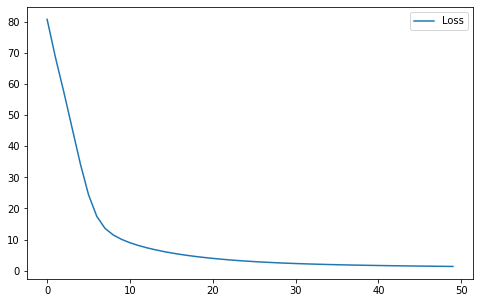

In [11]:
# Plot epoch vs loss

plt.figure(figsize=(8, 5))
plt.plot(range(num_epochs), loss_, label='Loss')
plt.legend()

From the plot above, we see that the loss is reducing exponentially as the number of epochs increases. This is because the model is learning the underlying function. Backpropagation updates weights and biases so as to minimize the loss which is seen from the 50 epochs above.

In [12]:
# Initialise model and loss
loss = MeanSquareError()
model = Model(input_dim, output_dim, hidden_dim)

# Train model - one forward and one backward pass for visualization
y_pred = model(x)
loss_value = loss(y_pred, y_true)
loss_gradient = loss.backward()
model.backward(loss_gradient)
model.update(learning_rate)
y_pred = model(x)

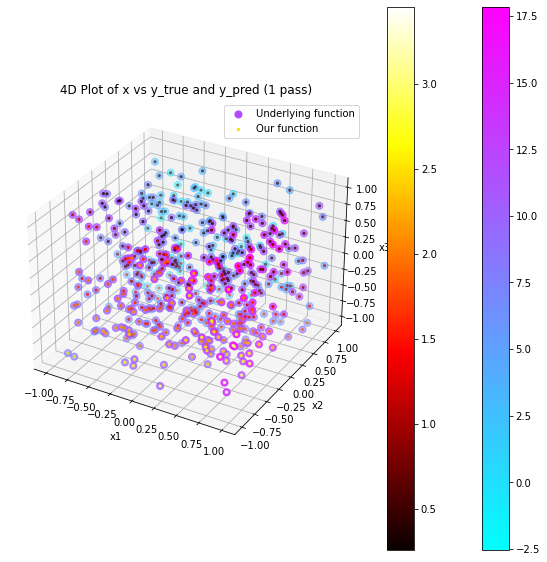

In [13]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(x[:, 0], x[:, 1], x[:, 2], c=y_true, cmap='cool', label='Underlying function', s=50)
fig.colorbar(sc)
sc = ax.scatter(x[:, 0], x[:, 1], x[:, 2], c=y_pred, cmap='hot', label='Our function', marker='.')
fig.colorbar(sc)

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')
ax.set_title('4D Plot of x vs y_true and y_pred (1 pass)')

plt.legend()
plt.show()

If zoomed into the above plot, we see that the learned function ('.') is amost overlaping with the true underlying function ('●'). But on closer inspection, we notice that the values of y_true and y_pred do not match (if we match the colors from the color bar), showing that with just iteration, the network hasn't learnt the underlying function much.